In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import env
import wrangle

### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

### In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

### Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [4]:
url = env.get_db_url('zillow')

In [6]:
query = """select bedroomcnt
	, bathroomcnt
    , calculatedfinishedsquarefeet
    , taxvaluedollarcnt 
	, yearbuilt
    , taxamount
    , fips
--     , propertylandusedesc
from properties_2017
	-- join propertylandusetype 
		-- using (propertylandusetypeid)
where propertylandusetypeid = 261
limit 100
"""

In [7]:
pd.read_sql(query, url)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
95,3.0,1.5,1698.0,286606.0,1979.0,2987.36,6111.0
96,3.0,1.0,1058.0,185908.0,1959.0,2764.58,6111.0
97,3.0,2.0,1688.0,285106.0,1958.0,3659.32,6111.0
98,3.0,2.0,1066.0,54684.0,1958.0,1260.60,6111.0


In [108]:
df = wrangle.get_zillow_data()

csv file found and loaded



In [109]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [110]:
df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

In [111]:
df.shape

(2152864, 7)

In [112]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
dtype: int64

Takeaways
- everything is a float, might change that
- my target variable: taxvaluedollarcnt
- each row is a property and it's associated values



In [113]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [114]:
df.fips.value_counts()

6037.0    1431812
6059.0     555077
6111.0     165975
Name: fips, dtype: int64

### Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

#### rename columns

In [115]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [116]:
df = df.rename(columns={'bedroomcnt':'bedrooms',
                  'bathroomcnt':'bathrooms',
                  'calculatedfinishedsquarefeet':'area',
                  'taxvaluedollarcnt':'taxvalue',
                  'fips':'county'})

In [117]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


#### handle nulls

In [118]:
df.isnull().sum()

bedrooms       11
bathrooms      11
area         8485
taxvalue      493
yearbuilt    9338
taxamount    4442
county          0
dtype: int64

In [119]:
df [(df.yearbuilt.isnull()) & (df.bedrooms > 0)]

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
148,4.0,4.0,3002.0,1313252.0,NaN,13710.32,6111.0
3531,3.0,1.0,1044.0,154489.0,NaN,1997.82,6037.0
3532,2.0,1.0,1018.0,51454.0,NaN,682.22,6037.0
10731,3.0,2.5,2340.0,328839.0,NaN,3453.30,6111.0
10868,3.0,2.0,1926.0,132138.0,NaN,1492.22,6111.0
...,...,...,...,...,...,...,...
2140691,2.0,1.0,NaN,206957.0,NaN,2785.44,6059.0
2140730,1.0,2.0,NaN,219924.0,NaN,3593.72,6059.0
2145456,3.0,1.0,1866.0,44084.0,NaN,640.32,6037.0
2150218,2.0,1.0,NaN,73360.0,NaN,1786.28,6059.0


In [120]:
9338 / len(df) * 100

0.4337477889917803

In [121]:
df.shape

(2152864, 7)

In [122]:
df = df.dropna()

In [123]:
df.isnull().sum()

bedrooms     0
bathrooms    0
area         0
taxvalue     0
yearbuilt    0
taxamount    0
county       0
dtype: int64

#### check datatypes

In [124]:
df.dtypes

bedrooms     float64
bathrooms    float64
area         float64
taxvalue     float64
yearbuilt    float64
taxamount    float64
county       float64
dtype: object

In [125]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [126]:
for col in df.columns:
    print(col)
    print(df[col].value_counts().sort_index())
    print()

bedrooms
0.0       4397
1.0      22895
2.0     334221
3.0     962944
4.0     633608
5.0     150671
6.0      25117
7.0       4792
8.0       1103
9.0        290
10.0       118
11.0        34
12.0        12
13.0        15
14.0         7
15.0         5
16.0         2
18.0         3
25.0         1
Name: bedrooms, dtype: int64

bathrooms
0.00       4274
0.50         16
1.00     412582
1.50      31157
1.75          3
2.00     942463
2.50     142827
3.00     422398
3.50      28464
4.00      82039
4.50      19474
5.00      28306
5.50       6201
6.00      10717
6.50       1330
7.00       4381
7.50        382
8.00       1681
8.50        108
9.00        707
9.50         50
10.00       322
10.50        14
11.00       145
11.50         3
12.00        73
12.50         3
13.00        39
14.00        25
14.50         1
15.00        17
16.00        12
17.00         4
18.00         8
19.00         1
19.50         1
20.00         6
32.00         1
Name: bathrooms, dtype: int64

area
1.0         6
2.0     

In [219]:
make_ints = ['bedrooms','area','taxvalue','yearbuilt','county']

In [127]:
for col in make_ints:
    df[col] = df[col].astype(int)

In [128]:
df.dtypes

bedrooms       int64
bathrooms    float64
area           int64
taxvalue       int64
yearbuilt      int64
taxamount    float64
county         int64
dtype: object

In [129]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


6037 - la
6059 - orange
6111 - ventura

In [130]:
df.county = df.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})

In [131]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


#### visualize

In [132]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


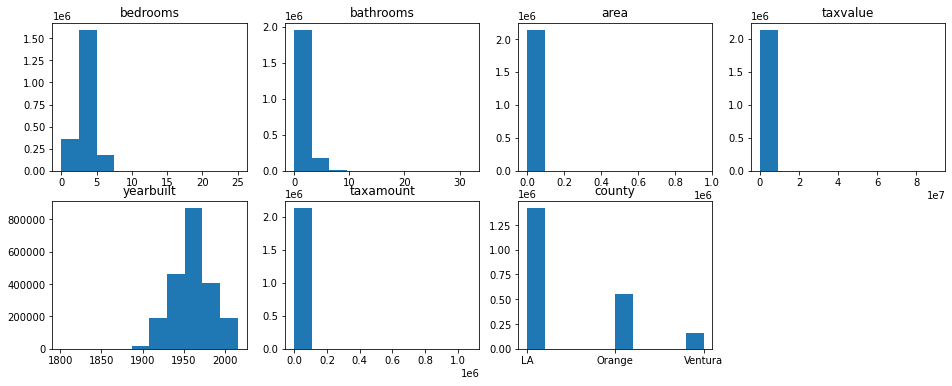

In [133]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2, 4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    plt.hist(df[col])

plt.show()

bedrooms


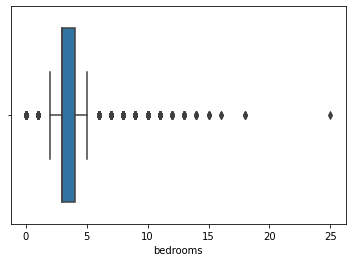

0       4397
1      22895
2     334221
3     962944
4     633608
5     150671
6      25117
7       4792
8       1103
9        290
10       118
11        34
12        12
13        15
14         7
15         5
16         2
18         3
25         1
Name: bedrooms, dtype: int64

bathrooms


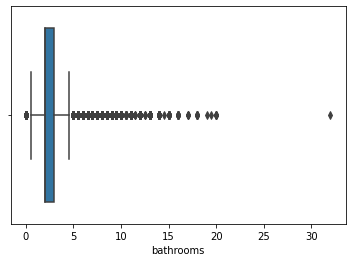

0.00       4274
0.50         16
1.00     412582
1.50      31157
1.75          3
2.00     942463
2.50     142827
3.00     422398
3.50      28464
4.00      82039
4.50      19474
5.00      28306
5.50       6201
6.00      10717
6.50       1330
7.00       4381
7.50        382
8.00       1681
8.50        108
9.00        707
9.50         50
10.00       322
10.50        14
11.00       145
11.50         3
12.00        73
12.50         3
13.00        39
14.00        25
14.50         1
15.00        17
16.00        12
17.00         4
18.00         8
19.00         1
19.50         1
20.00         6
32.00         1
Name: bathrooms, dtype: int64

area


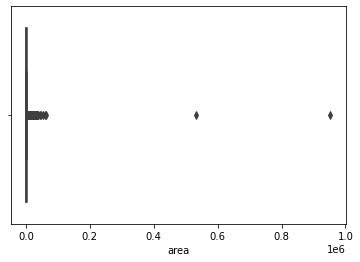

1         6
2         2
3         7
7         1
10        2
         ..
52503     1
59220     1
63692     1
531118    1
952576    1
Name: area, Length: 10557, dtype: int64

taxvalue


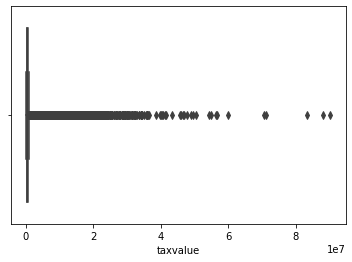

22          10
23           6
31           1
46           1
101          1
            ..
70416358     1
71067500     1
83196095     1
88020448     1
90188462     1
Name: taxvalue, Length: 588178, dtype: int64

yearbuilt


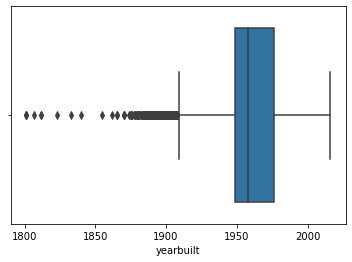

1801       3
1807       1
1812       2
1823       1
1833       1
        ... 
2012    3431
2013    4768
2014    4706
2015    3551
2016      97
Name: yearbuilt, Length: 153, dtype: int64

taxamount


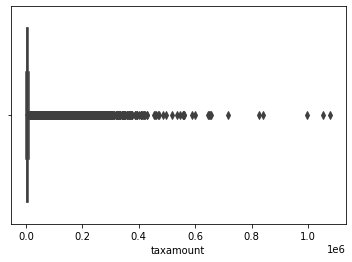

6.34          1
13.36         4
13.44         1
13.47         4
13.48         1
             ..
824166.91     1
841059.04     1
994030.96     1
1052070.50    1
1078101.87    1
Name: taxamount, Length: 915868, dtype: int64



In [134]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show()
    
    print(df[col].value_counts().sort_index())
    print()

#### outliers

In [135]:
df.area.value_counts().sort_index()

1         6
2         2
3         7
7         1
10        2
         ..
52503     1
59220     1
63692     1
531118    1
952576    1
Name: area, Length: 10557, dtype: int64

In [136]:
df.area.mean()

1863.1939702883094

In [137]:
df = df [df.area < 25_000]

In [138]:
df

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA
...,...,...,...,...,...,...,...
2152857,4,4.0,4375,422400,2015,13877.56,LA
2152859,4,3.0,2262,960756,2015,13494.52,Orange
2152860,4,4.5,3127,536061,2014,6244.16,Orange
2152862,3,2.5,1974,424353,2015,5302.70,Orange


In [144]:
df = df [df.taxvalue < df.taxvalue.quantile(.95)].copy()

In [145]:
df.shape

(2033172, 7)

In [146]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


bedrooms


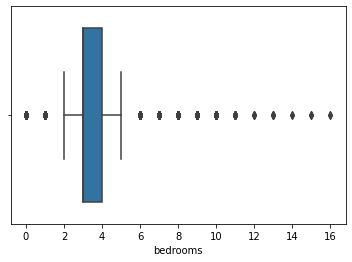

0       4208
1      22430
2     328193
3     938561
4     595894
5     122659
6      17628
7       2843
8        536
9        136
10        52
11        16
12         4
13         5
14         2
15         3
16         2
Name: bedrooms, dtype: int64

bathrooms


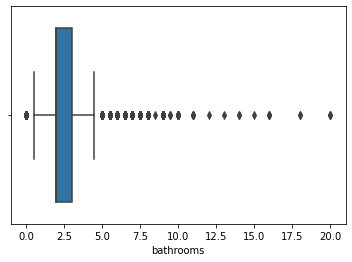

0.00       4096
0.50         13
1.00     410357
1.50      31011
1.75          3
2.00     931475
2.50     140062
3.00     400774
3.50      22501
4.00      62953
4.50      10614
5.00      14220
5.50       1228
6.00       2830
6.50        150
7.00        618
7.50         66
8.00        134
8.50          1
9.00         29
9.50          3
10.00        15
11.00         5
12.00         1
13.00         1
14.00         2
15.00         1
16.00         4
18.00         2
20.00         3
Name: bathrooms, dtype: int64

area


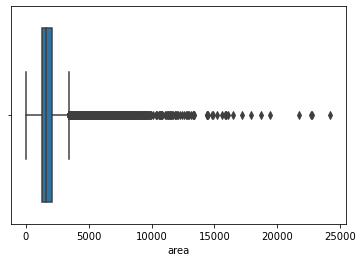

1        6
2        1
3        6
10       2
12       1
        ..
19460    1
21734    1
22702    1
22800    1
24220    1
Name: area, Length: 6639, dtype: int64

taxvalue


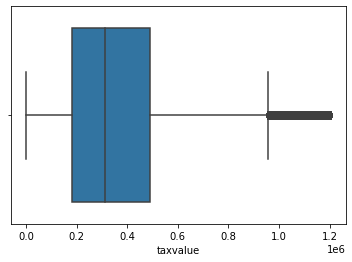

22         10
23          6
31          1
46          1
101         1
           ..
1202886     1
1202942     1
1202959     1
1202988     1
1202999     1
Name: taxvalue, Length: 523005, dtype: int64

yearbuilt


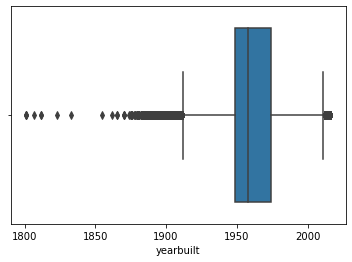

1801       3
1807       1
1812       2
1823       1
1833       1
        ... 
2012    2386
2013    3210
2014    3319
2015    2638
2016      74
Name: yearbuilt, Length: 152, dtype: int64

taxamount


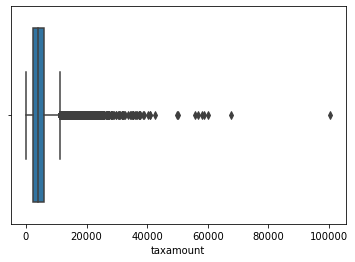

6.34         1
13.36        4
13.44        1
13.47        4
13.48        1
            ..
57963.32     1
58634.77     1
60110.79     1
67715.45     1
100379.34    1
Name: taxamount, Length: 814643, dtype: int64



In [147]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show()
    
    print(df[col].value_counts().sort_index())
    print()

### Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [158]:
import os

In [159]:
def check_file_exists(fn, query, url):
    if os.path.isfile(fn):
        print('csv file found and loaded\n')
        return pd.read_csv(fn, index_col=0)
    else: 
        print('creating df and exporting csv\n')
        df = pd.read_sql(query, url)
        df.to_csv(fn)
        return df 

In [160]:
def get_zillow_data():
    url = env.get_db_url('zillow')
    filename = 'zillow.csv'
    query = '''select 
                bedroomcnt
                , bathroomcnt
                , calculatedfinishedsquarefeet
                , taxvaluedollarcnt
                , yearbuilt
                , taxamount
                , fips
            from properties_2017
                join propertylandusetype
                    using (propertylandusetypeid)
            where propertylandusetypeid in (261, 279)
            '''

    df = check_file_exists(filename, query, url)

    return df 

In [166]:
def wrangle_zillow(df):
    df = df.rename(columns = {'bedroomcnt':'bedrooms',
                     'bathroomcnt':'bathrooms',
                     'calculatedfinishedsquarefeet':'area',
                     'taxvaluedollarcnt':'taxvalue',
                     'fips':'county'})
    
    df = df.dropna()
    
    make_ints = ['bedrooms','area','taxvalue','yearbuilt']

    for col in make_ints:
        df[col] = df[col].astype(int)
        
    df.county = df.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})
            
    df = df [df.area < 25_000].copy()
    df = df[df.taxvalue < df.taxvalue.quantile(.95)].copy()
    
    return df

In [167]:
df = get_zillow_data()

csv file found and loaded



In [168]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [171]:
wrangle_zillow(df)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA
...,...,...,...,...,...,...,...
2152857,4,4.0,4375,422400,2015,13877.56,LA
2152859,4,3.0,2262,960756,2015,13494.52,Orange
2152860,4,4.5,3127,536061,2014,6244.16,Orange
2152862,3,2.5,1974,424353,2015,5302.70,Orange


#### train test split

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)

In [176]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1228108,3.0,2.0,1430.0,128137.0,1970.0,1826.74,6111.0
99712,3.0,1.0,1048.0,445000.0,1935.0,5611.39,6037.0
1637472,0.0,0.0,226.0,10352.0,1988.0,289.04,6037.0
1260731,3.0,1.0,1109.0,362762.0,1947.0,4392.99,6037.0
579338,2.0,1.0,1147.0,498000.0,1952.0,5950.70,6059.0


In [177]:
train.shape

(1291718, 7)